Follows on from part 1...

**The Challenge**  

Construct an alternative to the above solution by using one or more classes instead of a single function. Instances of this distribution class should store the distribution parameters as attributes, and also contain a draw method, which draws a fresh set of random numbers according to the distributions parameters, and a summarise method, which prints the min, max, mean, and standard deviation of the newly drawn sample.

**Background Reading** 

I read up on a great OOP course that I atteneded previously. Unfortunately this is not available online, but I'm happy to share the slides from this if need be. Additionally I've always found my experience with JavaScript, in particular React to be of great benefit when it comes to dealing with OOP, since everything persists whether you want it to or not!

As before I'm going to import the libraries I need as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

I have opted to do this in a Jupyter notebook, however I didn't realise quite how long the code would get! As such, there is a DistributionSampler.py file available in the repo that holds this code [here](https://github.com/Tommo565/distribution-sampler) that may be slightly easier on the eye.

**My Approach**  

Since I've already created the core functionality in the function package, I can re-use a lot of that simply by refactoring it into a class. However there will need to be some additions as classes are meant to be used differently to functions, and persistance can create issues if not properly addressed up front.

As such I'm planning the structure of my class to be as follows:

* DistributionSampler class
    * `__init__`: Constructor
    * `set_parameters`: Convenience method to make setting the parameters easier for the user.
    * `_validate_parameters` Private method used to validate the parameters that the user inputs
    * `draw`: Part of the challenge - this method that will be used to pull data into the sample.
    * `summarise`: Part of the challenge - this method will create a summary of the results.

In [2]:
class DistributionSampler:
    def __init__ (self, size=None, dist=None, mean=None, sd=None, lam=None, trials=None, prob=None):
        '''
        
        Overview
        --------
        
        Selects a random sample from a given distribution, based upon the input parameters,
        and returns a numpy array object.
        
        You can set the parameters either upon creation of the instance or by using the 
        set_parameters() method.
        
        Note that if you set the parameters upon creation of the instance, the class will attempt
        to create ths distribution immediately.
        
        If you change or create the parameters at a later time, you can create the sample using the
        draw() method.   
        
        Attributes
        ----------
        
        size : integer

        The number of samples to be selected from the distribution.

        distribution : string

        The type of distribution to be created. Applicable values are 'Normal', 
        'Poisson' or 'Binomial'.

        mean : float / int , optional

        Applicable to Normal distributions only. The mean value will dictate the 
        centre of the distribution.

        sd: float / int , optional

        Applicable to Normal distributions only. The sd (Standard Deviation) will
        dictate the spread or width of the distribution.

        lam : float / int , optional

        Applicable to Poisson distributions only. The lam (lambda) controls the mean 
        and variance of the sample.

        trials: float / int , optional

        Applicable to Binomial distributions only. The trials parameter is used to 
        dictate the number of trials to run in generating the sample

        prob: float / int , optional

        Applicable to Binomial distributions only. The prob parameter is used to dicitate
        the probability of a trial being successful.
        
        Notes
        -----

        The samples are generated using the numpy library, v1.15. For more details,
        check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/

        Examples
        --------
        
        Instance = DistributionSampler(1000, 'Normal', mean=0, sd = 5)
        s = Instance.draw()
        
        Instance = DistributionSampler()
        Instance.set_parameters(size=1000, dist='Poisson', lam=5)
        s = Instance.draw()
        
        Instance = DistributionSampler()
        Instance.size = 1000
        Instance.dist = 'Binomial'
        Instance.trials = 5
        Instance.prob = 0.5
        s = Instance.draw()

        
        '''
        
        self.size = size
        self.dist = dist
        self.mean = mean
        self.sd = sd
        self.lam = lam
        self.trials = trials
        self.prob = prob
        self.sample = None
        self.sample_parameters = {}
        
        
        # If the parameters are filled upon creation of the instance, run the draw method.
        if (size is not None) and (dist is not None):
            if (mean is not None) and (sd is not None):
                self.draw()
                
            elif (lam is not None):
                self.draw()
                
            elif (trials is not None) and (prob is not None):
                self.draw()        
        
    def print_parameters(self):
        '''
        
        Overview
        --------
        
        Prints the current parameter values to the console. You can update the parameters using 
        the set_parameters() method.
        
        Parameters
        ----------
        
        None
        
        
        Returns
        -------
        
        No values are returned, instead the parameters are printed to the console
        
        Notes
        -----

        The samples are generated using the numpy library, v1.15. For more details,
        check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/
        
        Examples
        --------
        
        Instance.print_parameters()
        
        '''
        print('Parameters')
        print('-----------')
        print('size: {}'.format(self.size))
        print('dist: {}'.format(self.dist))
        print('mean: {}'.format(self.mean))
        print('sd: {}'.format(self.sd))
        print('lam: {}'.format(self.lam))
        print('trials: {}'.format(self.trials))
        print('prob: {}'.format(self.prob))
        
    def print_sample(self):
        '''
        
        Overview
        --------
        
        Prints the current sample to the console. In the event that there is no sample to print, 
        instructions on how to set the parameters and create the sample are given.

        Parameters
        ----------
        
        None
        
        
        Returns
        -------
        
        No values are returned, instead the parameters are printed to the console
        
        Notes
        -----

        The samples are generated using the numpy library, v1.15. For more details,
        check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/
        
        Examples
        --------
        
        Instance.print_sample()
        
        '''
        if sample is None:
            print(
                'No Sample to print. Use the .set_parameters() method to set appropriate parameters '
                'and then run the draw() method to create a sample.'
            )

        else:
            print(self.sample)
        
        
    def set_parameters(self, size='', dist='', mean='', sd='', lam='', trials='', prob=''):
        '''
        
        Overview
        --------
        
        Sets the parameters for the selection of the distribution. Multiple parameters can 
        be passed in a single call to the function.

        Parameters
        ----------
        size : integer

        The number of samples to be selected from the distribution.

        distribution : string

        The type of distribution to be created. Applicable values are 'Normal', 
        'Poisson' or 'Binomial'.

        mean : float / int , optional

        Applicable to Normal distributions only. The mean value will dictate the 
        centre of the distribution.

        sd: float / int , optional

        Applicable to Normal distributions only. The sd (Standard Deviation) will
        dictate the spread or width of the distribution.

        lam : float / int , optional

        Applicable to Poisson distributions only. The lam (lambda) controls the mean 
        and variance of the sample.

        trials: float / int , optional

        Applicable to Binomial distributions only. The trials parameter is used to 
        dictate the number of trials to run in generating the sample

        prob: float / int , optional

        Applicable to Binomial distributions only. The prob parameter is used to dicitate
        the probability of a trial being successful.


        Returns
        -------

        None

        Notes
        -----

        The samples are generated using the numpy library, v1.15. For more details,
        check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/

        Examples
        --------
        s = distribution_sampler(1000, 'Normal', mean=0, sd = 5)
        s = distribution_sampler(1000, 'Poisson', lam=5)
        s = distribution_sampler(1000, 'Binomial', trials=5, prob=0.5)    
        '''

        local_data = locals() 
    
        params = dict(local_data)
        del params['self']

        for key, value in params.items():
            if value == '':
                pass
            else:
                # This is a hack to get around exec not resolving quotes.
                if key == 'dist':
                    self.dist = value
                    
                else:
                    exec('self.{} = {}'.format(key, value))

                
        
    def _validate_parameters(self):
        '''
        Private function to validate the input parameters, called during the draw() method.
        If the parameters are not valid, an error message will display with instructions on
        how to input valid parameters
        '''
        
        # Mandatory parameter error handling

        if self.dist not in ['Normal', 'Poisson', 'Binomial']:
            raise ValueError("The dist parameter is mandatory and  must equal 'Normal', 'Poisson', or 'Binomial'")

        if not isinstance(self.size, int):
            raise ValueError('The size parameter is mandatory and  must be an integer.')
        
        # Distribution Specific Error Handling
        
        if self.size is None:
            raise ValueError(
                'You need to set a sample size prior to '
                'calling the draw method. This must be an integer. E.g. 10000. '
                'Parameters can be input either using the set_parameters() method, ' 
                'by manually updating the instance. E.g. Instance.size = 10000 '
                'or by passing parameters to the draw() method. E.g. Instance.draw(size=10000)'
                
        )    
        
        if self.dist is None:
            raise ValueError(
                'You need to set a dist parameter to specify the type of distribution prior to '
                'calling the draw method. Available parameters are as follows:\n\n'
                "'Normal'\n'Poisson'\n'Binomial'"
                ''
                'Parameters can be input either using the set_parameters() method, '
                'by manually updating the instance. E.g. Instance.dist = "Normal" '
                'or by passing parameters to the draw() method. E.g. Instance.draw(dist="Normal")'
        )
            
        if self.dist == 'Normal':
            # Raise an error if the mean or sd parameters aren't set
            if (self.mean is None) or (self.sd is None):
                raise NameError(
                    "The mean and sd parameters must be set where the dist is set to 'Normal'. "
                    'Parameters can be input either using the set_parameters() method, '
                    'by manually updating the instance (e.g. Instance.mean = 1) '
                    'or by passing parameters to the draw() method. E.g. Instance.draw(mean=q)'
                )

            # Raise a warning if irrelevent parameters are provided
            elif (self.lam is not None) or (self.trials is not None) or (self.prob is not None):
                warnings.warn(
                    'The lam, trials and prob parameters are not used in the selection of a normal '
                    'distribution. These parameters will be ignored.\n'
                )
                
        if self.dist == 'Poisson':
            # Raise an error if the lam parameter isn't set
            if self.lam is None:
                raise NameError(
                    "The lam parameter must be set where dist is set to 'Poisson'. "
                    'Parameters can be input either using the set_parameters() method, '
                    'by manually updating the instance. (e.g. Instance.lam = 5), '
                    'or by passing parameters to the draw() method. E.g. Instance.draw(lam=5)'
                
                )

            # Raise a warning if irrelevent parameters are provided
            elif (self.mean is not None) or (self.sd is not None) or (self.trials is not None) or (self.prob is not None):
                warnings.warn(
                    'The mean, sd, trials and prob parameters are not used in the selection of a ' 
                    'poisson distribution. These parameters will be ignored.\n'
                )
                
        if self.dist == 'Binomial':
            # Raise an error if the trials or prob parameters aren't set
            if (self.trials is None) or (self.prob is None):
                raise NameError(
                    "The trials and prob parameters must be set where dist == 'Binomial'. "
                    'Parameters can be input either using the set_parameters() method, '
                    'by manually updating the instance (e.g. Instance.lam = 5) '
                    'or by passing parameters to the draw() method. E.g. Instance.draw(lam=5)'
                )

            # Raise a warning if irrelevent parameters are provided
            elif (self.mean is not None) or (self.sd is not None) or (self.lam is not None):
                warnings.warn(
                    'The mean, sd and lam parameters are not used in the selection of a binomial ' 
                    'distribution. These parameters will be ignored.\n'
                ) 
        
    def draw(self, size='', dist='', mean='', sd='', lam='', trials='', prob=''):
        '''
        
        Overview
        --------
        
        Creates a sample based upon the input parameters. If there have been parameters passed to the function,
        The method will first run the set_parameters() method to update the parameters before validating these
        using the private method.

        Parameters
        ----------
        
        None


        Returns
        -------

        s : A numpy array of samples based upon the input parameters.

        Notes
        -----

        The samples are generated using the numpy library, v1.15. For more details,
        check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/

        Examples
        --------
        s = Instance.draw()
        s = Instance.draw(size=1000, dist='Normal', mean=1, sd=2)
        '''
        self.set_parameters(size=size, dist=dist, mean=mean, sd=sd, lam=lam, trials=trials, prob=prob)
        self._validate_parameters()
          
        if self.dist == 'Normal':
            self.sample = np.random.normal(self.mean, self.sd, self.size)            
            self.sample_parameters['Distribution'] = self.dist
            self.sample_parameters['Sample Size'] = self.size
            self.sample_parameters['Mean'] = self.mean
            self.sample_parameters['Standard Deviation'] = self.sd
            self.sample_parameters['Minimum Value'] = self.sample.min()
            self.sample_parameters['Maximum Value'] = self.sample.max()
            self.sample_parameters['graph_string'] = (
                 '{} Distribution, Mean: {}, Standard Deviation: {}'.format(self.dist, self.mean, self.sd)
            )
            print('Normal Distribution Created')
            print('')
            
        if self.dist == 'Poisson':
            self.sample = np.random.poisson(self.lam, self.size)          
            self.sample_parameters['Distribution'] = self.dist
            self.sample_parameters['Sample Size'] = self.size
            self.sample_parameters['Lambda'] = self.lam
            self.sample_parameters['Mean'] = self.sample.mean()
            self.sample_parameters['Standard Deviation'] = self.sample.std()
            self.sample_parameters['Minimum Value'] = self.sample.min()
            self.sample_parameters['Maximum Value'] = self.sample.max()
            self.sample_parameters['graph_string'] = (
                 '{} Distribution, Mean: {}, Standard Deviation: {}'.format(
                     self.dist, self.sample.mean(),self.sample.std()
                 )
            )
            print('Poisson Distribution Created')
            print('')
            
        if self.dist == 'Binomial':
            self.sample = np.random.binomial(self.trials, self.prob, self.size)         
            self.sample_parameters['Distribution'] = self.dist
            self.sample_parameters['Sample Size'] = self.size
            self.sample_parameters['Trial Size'] = self.trials
            self.sample_parameters['Probability'] = self.prob
            self.sample_parameters['Mean'] = self.sample.mean()
            self.sample_parameters['Standard Deviation'] = self.sample.std()
            self.sample_parameters['Minimum Value'] = self.sample.min()
            self.sample_parameters['Maximum Value'] = self.sample.max()
            self.sample_parameters['graph_string'] = (
                 '{} Distribution, Mean: {}, Standard Deviation: {}'.format(
                     self.dist, self.sample.mean(),self.sample.std()
                 )
            )
            print('Binomial Distribution Created')
            print('')
            
        return self.sample
    
    def summarise(self, graph=True):
        '''
        
        Overview
        --------
        
        Creates a summary, showing the parameters of the distribution alongside the mean, standard deviation, 
        minimum value and maximum of the currently held sample for the instance.
        
        It will additionally display a seaborn chart for the distribution, which can be turned off by setting
        the graph option to False.

        Parameters
        ----------
        
        graph , bool , optional
        
        Defaults to True. Setting this to False will result in no graph being created.


        Returns
        -------

        None

        Notes
        -----

        The samples are generated using the numpy library, v1.15. For more details,
        check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/

        Examples
        --------
        s = Instance.summarise()
        s = Instance.summarise(graph=False)
        '''
        if isinstance(self.sample, np.ndarray):
            print('Summary')
            print('-------')
            for key, value in self.sample_parameters.items():
                if key != 'graph_string':
                    print('{}: {}'.format(key, value))
                    
            if graph == True:
                ax = sns.distplot(self.sample).set_title(self.sample_parameters['graph_string'])
            
        else:
            raise ValueError(
                'You have not yet created a sample to summarise. You can create a sample by calling the '
                'draw() method with appropriate parameters e.g. Instance.draw(5000, "Normal", mean=2, sd=5) '
                'or of you have already input the parameters, simple call the draw function to create the '
                'sample e.g. Instance.draw()'
            )

You'll notice that I created a couple of extra methods from my plan as follows:

* `print_parameters`: Prints the current parameters. This was originally for testing purposes, however it may also be quite handy to the user.
* `print_sample`: Prints the current sample. This seemed like common sense to include as if you're going to give the user the option to print the parameters, you should probably give them the option to print the sample as well.

Additionally I hadn't planned to create the sample upon creation of the instance, however this seemed a lot more user friendly and meant that the sample could be created and summarised with 2 lines of code instead of three.

Lastly, I used a seaborn graph for validation purposes, and it seemed like a nice touch to keep it in, so I left it!

Testing the Class...

/Users/tomewing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:322: UserWarning: The lam, trials and prob parameters are not used in the selection of a normal distribution. These parameters will be ignored.

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Normal Distribution Created

Summary
-------
Distribution: Normal
Sample Size: 3000
Mean: 3
Standard Deviation: 1
Minimum Value: -0.7046490137321593
Maximum Value: 5.887495765091017


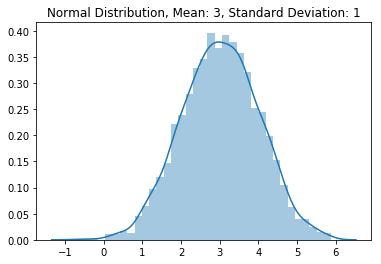

In [3]:
norm = DistributionSampler(dist='Normal', size=3000, mean=3, sd=1, lam=3, trials=5, prob=0.2)
norm.summarise()

Poisson Distribution Created

Summary
-------
Distribution: Poisson
Sample Size: 2000
Lambda: 5
Mean: 5.034
Standard Deviation: 2.2407239901424716
Minimum Value: 0
Maximum Value: 15


/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


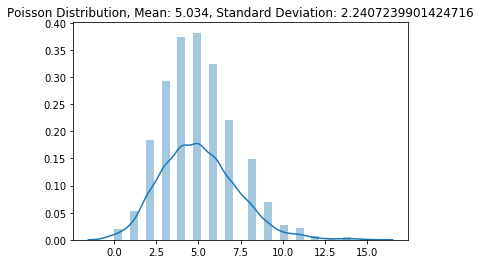

In [4]:
# Poisson Distribution
pois = DistributionSampler()
pois.set_parameters(dist='Poisson', size=2000, lam=5)
pois.draw()
pois.summarise()

Binomial Distribution Created

Summary
-------
Distribution: Binomial
Sample Size: 5000
Trial Size: 5
Probability: 0.1
Mean: 0.4766
Standard Deviation: 0.6544099938112192
Minimum Value: 0
Maximum Value: 4


/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


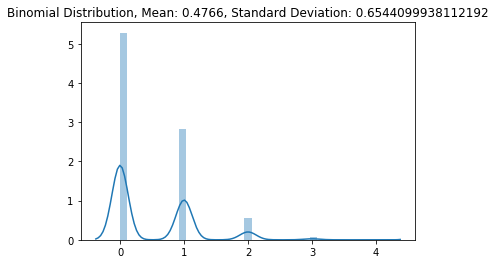

In [5]:
# Binomial Distribution
bi = DistributionSampler()
bi.draw(dist='Binomial', size=5000, trials=5, prob=0.1)
bi.summarise()

In [6]:
# Trying to break it...
dist = DistributionSampler(dist='Normal', size=4000, mean=3.5453, sd= 4.423)
dist.set_parameters(dist='Binomal', size=20, trials=50, prob=0.2)
dist.draw(dist='Poisson', size=10000, lam=1)
dist.print_parameters()
print('')
dist.summarise(graph=False)

Normal Distribution Created

Poisson Distribution Created

Parameters
-----------
size: 10000
dist: Poisson
mean: 3.5453
sd: 4.423
lam: 1
trials: 50
prob: 0.2

Summary
-------
Distribution: Poisson
Sample Size: 10000
Mean: 0.9789
Standard Deviation: 0.9983259938517078
Minimum Value: 0
Maximum Value: 6
Lambda: 1


/Users/tomewing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:340: UserWarning: The mean, sd, trials and prob parameters are not used in the selection of a poisson distribution. These parameters will be ignored.



Testing the error handling...

In [7]:
dist = DistributionSampler()
dist.summarise()

ValueError: You have not yet created a sample to summarise. You can create a sample by calling the draw() method with appropriate parameters e.g. Instance.draw(5000, "Normal", mean=2, sd=5) or of you have already input the parameters, simple call the draw function to create the sample e.g. Instance.draw()

In [8]:
dist = DistributionSampler(dist='Normal', lam=5)
dist.draw()

ValueError: The size parameter is mandatory and  must be an integer.

In [9]:
dist = DistributionSampler(dist='sdfmdsf', size=5000, mean=2, sd=1)
dist.draw()

ValueError: The dist parameter is mandatory and  must equal 'Normal', 'Poisson', or 'Binomial'

And finally test the Docstrings

In [10]:
help(DistributionSampler)

Help on class DistributionSampler in module __main__:

class DistributionSampler(builtins.object)
 |  DistributionSampler(size=None, dist=None, mean=None, sd=None, lam=None, trials=None, prob=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, size=None, dist=None, mean=None, sd=None, lam=None, trials=None, prob=None)
 |      Overview
 |      --------
 |      
 |      Selects a random sample from a given distribution, based upon the input parameters,
 |      and returns a numpy array object.
 |      
 |      You can set the parameters either upon creation of the instance or by using the 
 |      set_parameters() method.
 |      
 |      Note that if you set the parameters upon creation of the instance, the class will attempt
 |      to create ths distribution immediately.
 |      
 |      If you change or create the parameters at a later time, you can create the sample using the
 |      draw() method.   
 |      
 |      Attributes
 |      ----------
 |      
 |      size : in